In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df = pd.read_csv('battles.csv')

In [7]:
df[(df["year"]==300) & (df["attacker_king"] == "Balon/Euron Greyjoy")]
df.dtypes

name                   object
year                    int64
battle_number           int64
attacker_king          object
defender_king          object
attacker_1             object
attacker_2             object
attacker_3             object
attacker_4             object
defender_1             object
defender_2             object
defender_3            float64
defender_4            float64
attacker_outcome       object
battle_type            object
major_death           float64
major_capture         float64
attacker_size         float64
defender_size         float64
attacker_commander     object
defender_commander     object
summer                float64
location               object
region                 object
note                   object
dtype: object

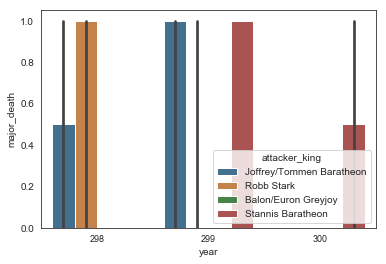

In [10]:
sns.set_style("white")
ex1 = sns.barplot(x="year",y="major_death",data = df,hue = "attacker_king",estimator=np.median,saturation=.5)

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


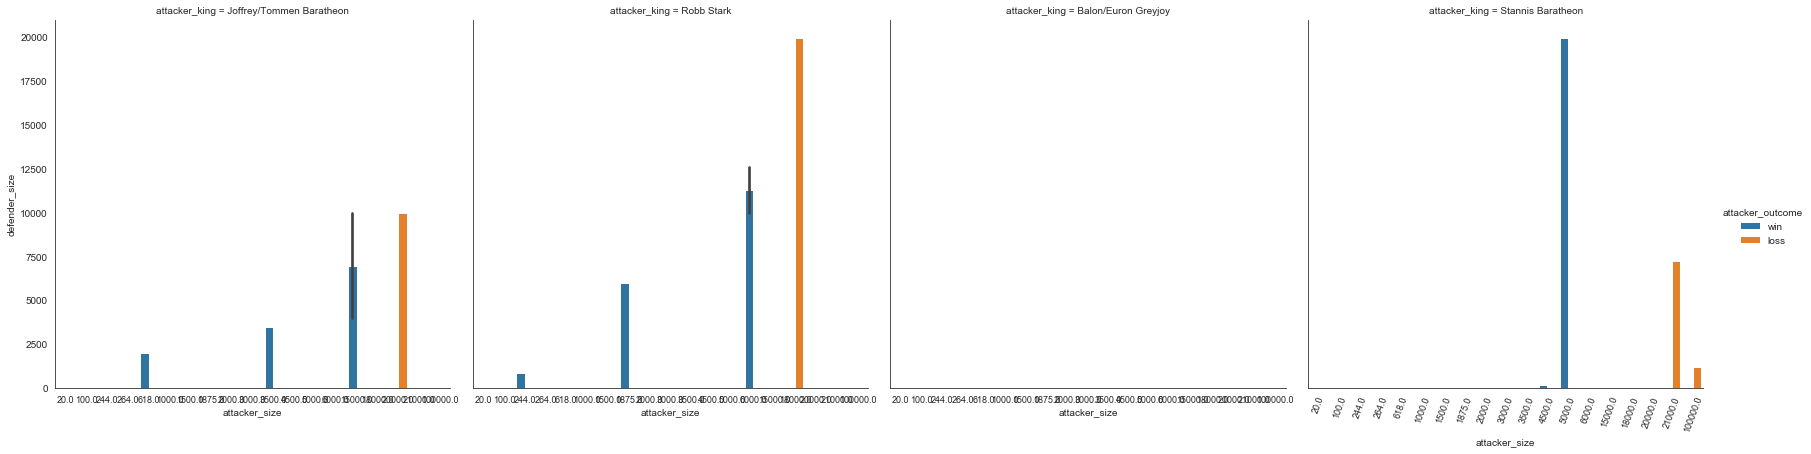

In [11]:
ex2 = sns.factorplot(x="attacker_size",y="defender_size",hue="attacker_outcome",col="attacker_king",data=df,size=6,kind="bar")
plt.xticks(rotation=70)
plt.rcParams["xtick.labelsize"]=9

(0, 30000)

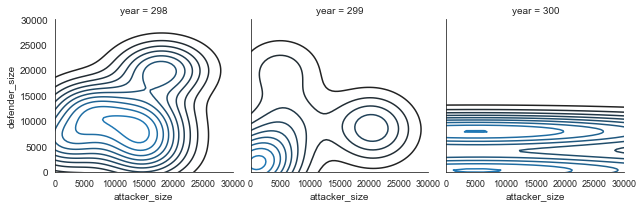

In [12]:
ex3 = sns.FacetGrid(df,col = "year")
ex3.map(sns.kdeplot,"attacker_size","defender_size",shade=False)
plt.xlim(0, 30000) 
plt.ylim(0, 30000)

(0, 30000)

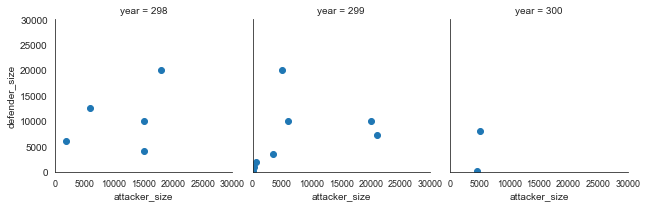

In [13]:
ex3 = sns.FacetGrid(df,col = "year")
ex3.map(plt.scatter,"attacker_size","defender_size")
plt.xlim(0, 30000) 
plt.ylim(0, 30000)

In [14]:
df.groupby("year").count()

,name,battle_number,attacker_king,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
year,,,,,,,,,,,,,,,,,,,,,
298,7,7,7,7,7,2,0,0,7,0,...,7,7,5,6,7,7,7,7,7,0
299,20,20,19,18,20,3,0,0,20,0,...,20,20,13,9,19,14,19,19,20,5
300,11,11,10,10,11,5,3,2,10,2,...,10,10,6,4,11,7,11,11,11,0


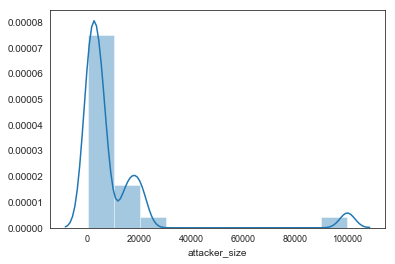

In [15]:
ex4 = sns.distplot(df['attacker_size'].dropna(),bins=10) # kde is Gaussian by default

/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


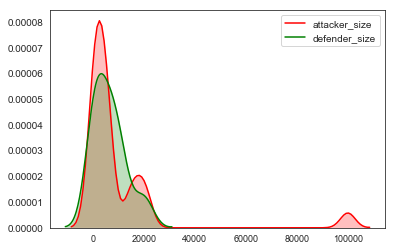

In [16]:
ex5 = sns.kdeplot(df['attacker_size'],shade = True,color='r',kernel='gau') #gau’‘cos’‘biw’‘epa’‘tri’‘triw’
# sns.distplot(df['attacker_size'].dropna()); # kde is Gaussian by default
ex6 = sns.kdeplot(df['defender_size'],shade = True,color='g',kernel='gau') #gau’‘cos’‘biw’‘epa’‘tri’‘triw’

In [17]:
df.groupby("attacker_king").count()

,name,year,battle_number,defender_king,attacker_1,attacker_2,attacker_3,attacker_4,defender_1,defender_2,...,major_death,major_capture,attacker_size,defender_size,attacker_commander,defender_commander,summer,location,region,note
attacker_king,,,,,,,,,,,,,,,,,,,,,
Balon/Euron Greyjoy,7,7,7,7,7,0,0,0,7,0,...,7,7,3,0,7,1,7,7,7,2
Joffrey/Tommen Baratheon,14,14,14,13,14,4,0,0,14,0,...,14,14,8,8,14,13,13,14,14,2
Robb Stark,10,10,10,10,10,3,0,0,10,0,...,10,10,8,6,10,9,10,10,10,1
Stannis Baratheon,5,5,5,5,5,3,3,2,5,2,...,4,4,5,5,5,5,5,5,5,0


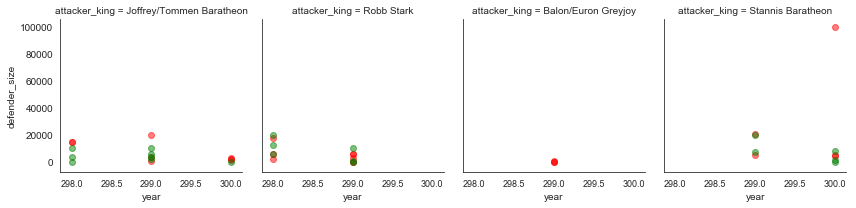

In [18]:
mean_attacker_year = df.groupby('attacker_king')
ex7 = sns.FacetGrid(df,col='attacker_king')
ex7.map(plt.scatter,"year","attacker_size",color='r',alpha=0.5)
ex7.map(plt.scatter,"year","defender_size",color='g',alpha=0.5)

In [19]:
df[df['attacker_king']=="Balon/Euron Greyjoy"][['year','attacker_size']]

,year,attacker_size
7,299,NaN
8,299,1000.0
9,299,264.0
11,299,20.0
12,299,NaN
31,300,NaN
32,300,NaN


In [20]:
df[df['attacker_king']=='Stannis Baratheon'][['year','attacker_size']].mean(skipna=True)

year               299.6
attacker_size    27100.0
dtype: float64

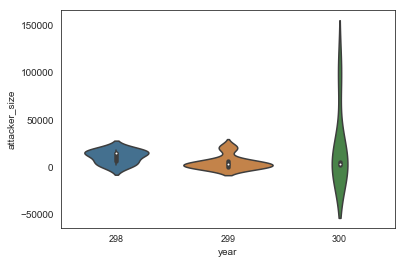

In [21]:
sns.violinplot(x='year',y='attacker_size',data=df,kind="violin",saturation=.5)

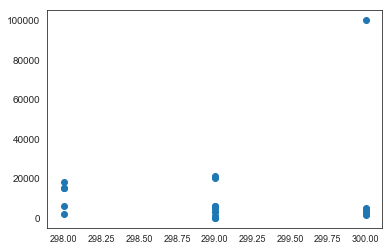

In [22]:
plt.scatter(x='year',y='attacker_size',data=df)

(0, 30000)

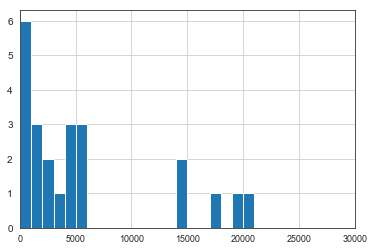

In [23]:
df['attacker_size'].hist(bins=100)
plt.xlim(0, 30000) 

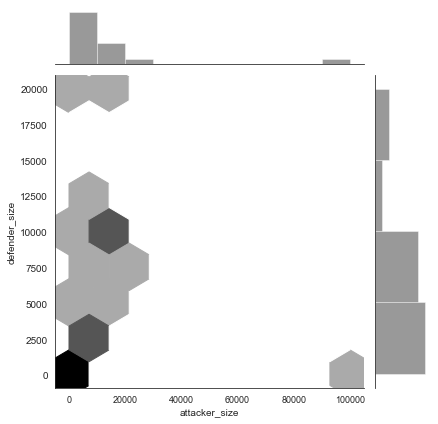

In [25]:
with sns.axes_style("white"):
    sns.jointplot(x=df['attacker_size'], y=df['defender_size'], kind="hex", color="k");

(0, 30000)

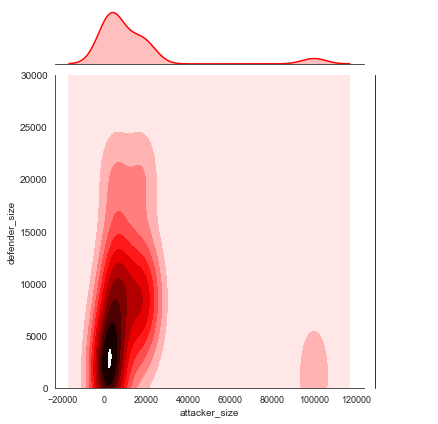

In [26]:
sns.jointplot(x=df['attacker_size'], y=df['defender_size'], data=df, kind="kde",color='r');
plt.xlim(0, 30000) 
plt.ylim(0, 30000)

In [29]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]
data = np.random.multivariate_normal(mean, cov, 200)
df2 = pd.DataFrame(data, columns=["x", "y"])

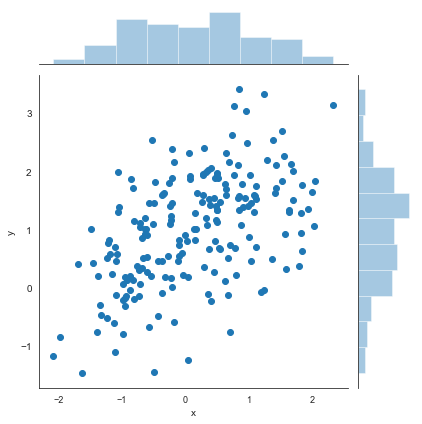

In [31]:
sns.jointplot(x="x", y="y", data=df2);

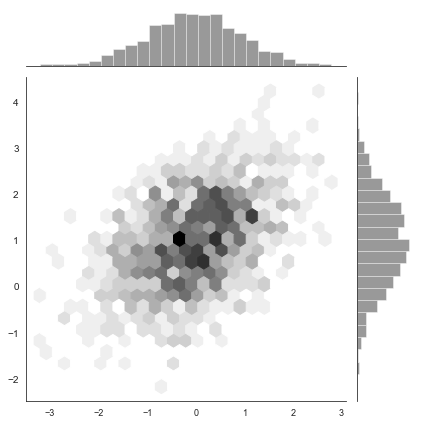

In [32]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

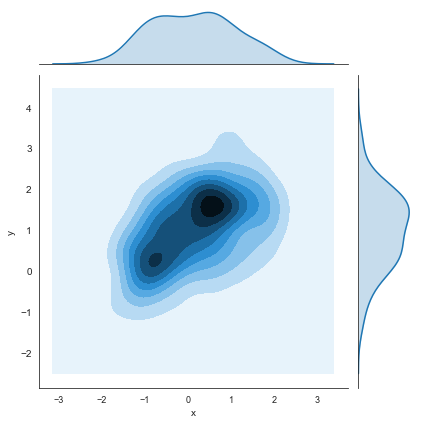

In [33]:
sns.jointplot(x="x", y="y", data=df2, kind="kde");

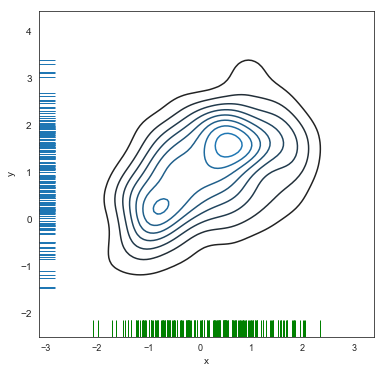

In [34]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df2.x, df2.y, ax=ax)
sns.rugplot(df2.x, color="g", ax=ax)
sns.rugplot(df2.y, vertical=True, ax=ax);

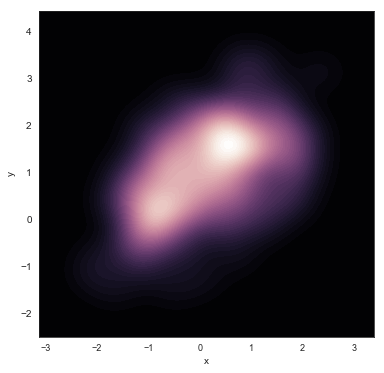

In [35]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df2.x, df2.y, cmap=cmap, n_levels=60, shade=True);

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


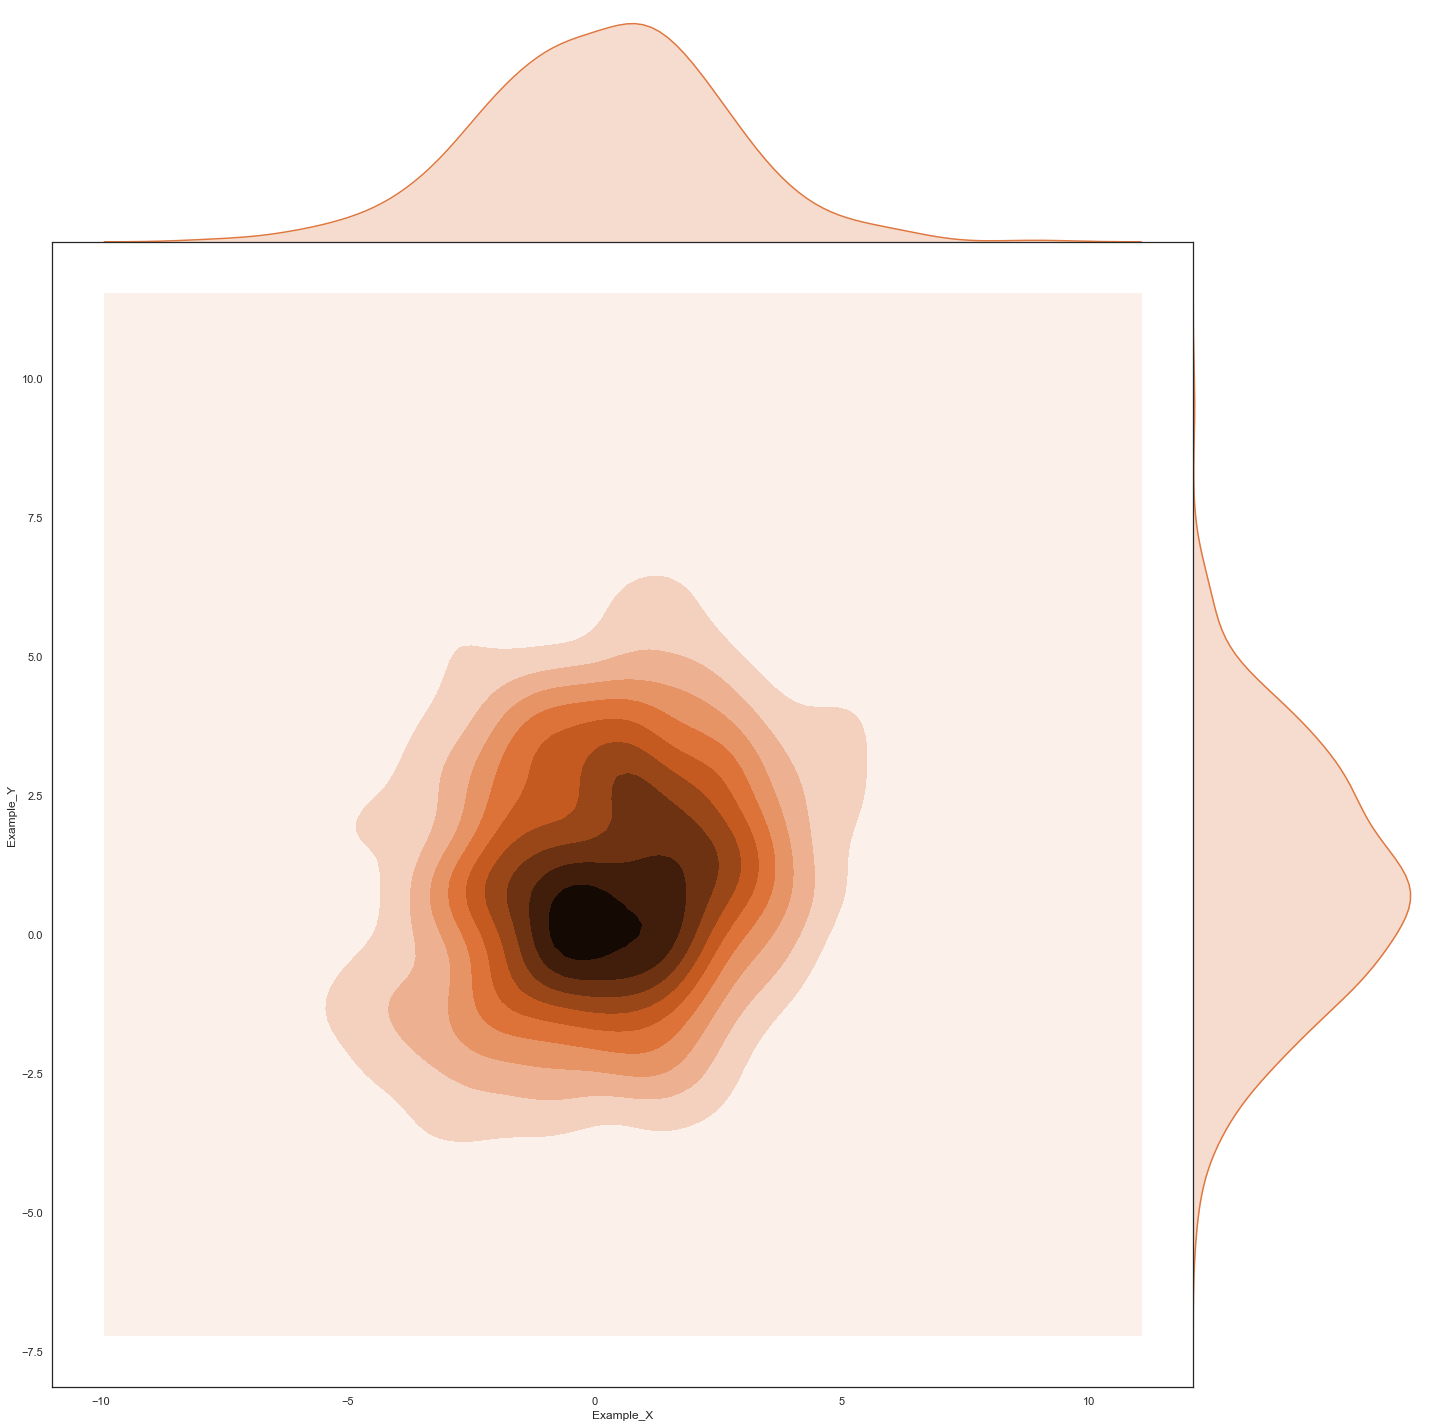

In [36]:
sns.set(style='white')
# random_state = np.random.RandomState(10)
mean, cov = [0, 1], [(5, .9), (.9, 5)]
x1,x2 = np.random.multivariate_normal(mean, cov, 500).T
x1 = pd.Series(x1,name="Example_X")
x2 = pd.Series(x2,name="Example_Y")
ex8 = sns.jointplot(x1, x2, kind="kde",size=20, space=0, color='#df773f')  # #581ea8

In [37]:
df = pd.read_csv('seaborn-data/flights.csv')

In [38]:
df.head(10)

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
5,1949,June,135
6,1949,July,148
7,1949,August,148
8,1949,September,136
9,1949,October,119


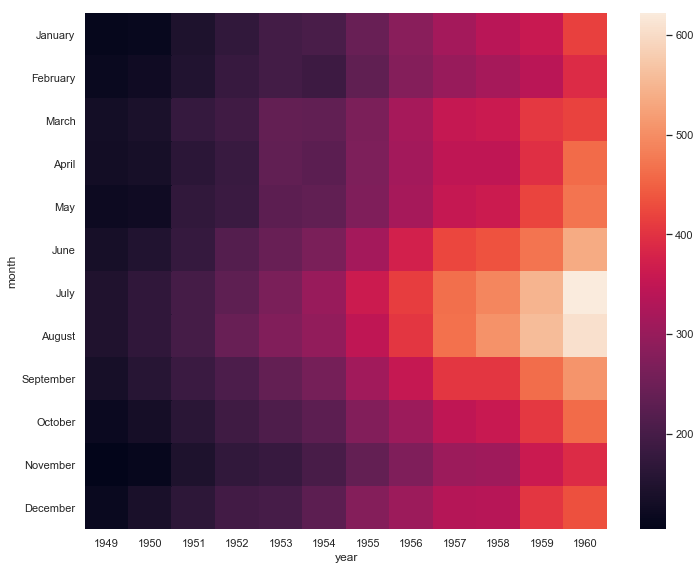

In [39]:
df9 = df.pivot('month','year','passengers')
#use chronological order but not alphabetical order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df9 = df9.reindex(months)

a4_dims = (11.7, 9.50)
fig, ax = plt.subplots(figsize=a4_dims)
ex9 = sns.heatmap(ax=ax,data=df9)

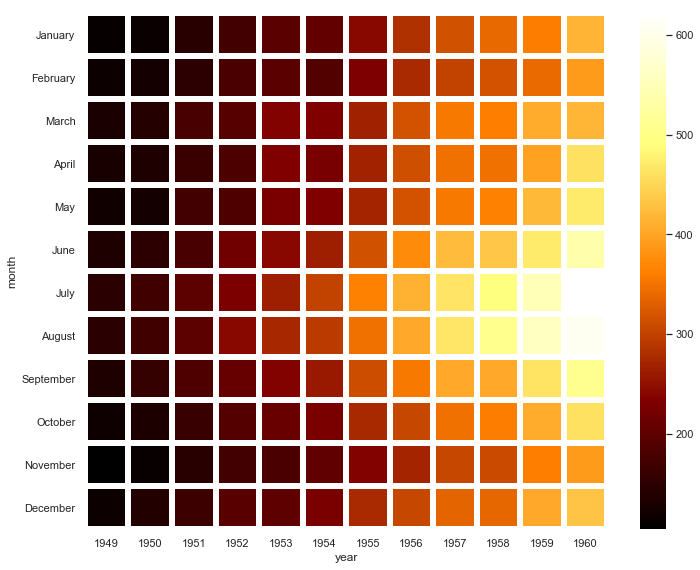

In [40]:
a4_dims = (11.7, 9.50)
fig, ax = plt.subplots(figsize=a4_dims)
# ex10 = sns.heatmap(ax=ax,data=df9,annot=True,fmt='d',cmap='viridis')
ex10 = sns.heatmap(ax=ax,data=df9,cmap='afmhot',linewidth=5)

Pokemon.csv https://www.kaggle.com/abcsds/pokemon/version/2

In [41]:
df_2 = pd.read_csv('Pokemon.csv')
df_2.dtypes

#              int64
Name          object
Type 1        object
Type 2        object
Total          int64
HP             int64
Attack         int64
Defense        int64
Sp. Atk        int64
Sp. Def        int64
Speed          int64
Generation     int64
Legendary       bool
dtype: object

In [42]:
df_2.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]), <a list of 18 Text xticklabel objects>)

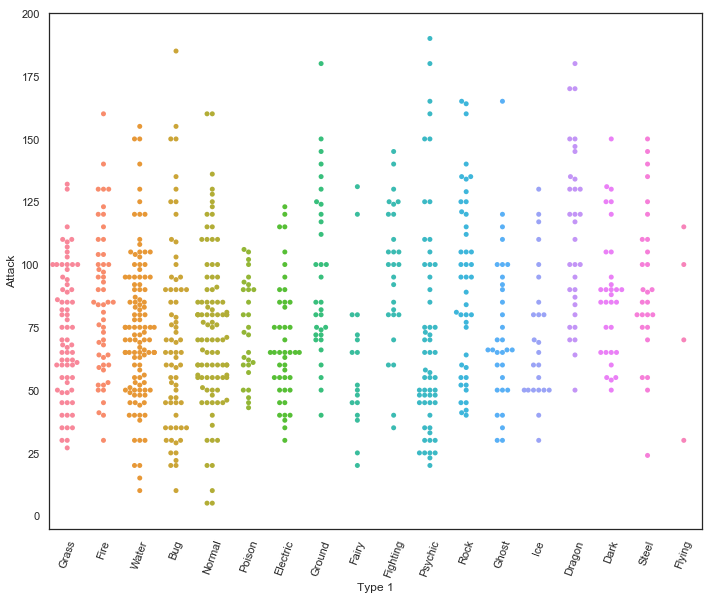

In [43]:
a4_dims = (11.7, 9.50)
fig, ax = plt.subplots(figsize=a4_dims)
sns.swarmplot(ax=ax,x='Type 1',y='Attack',data=df_2)
plt.xticks(rotation=70)

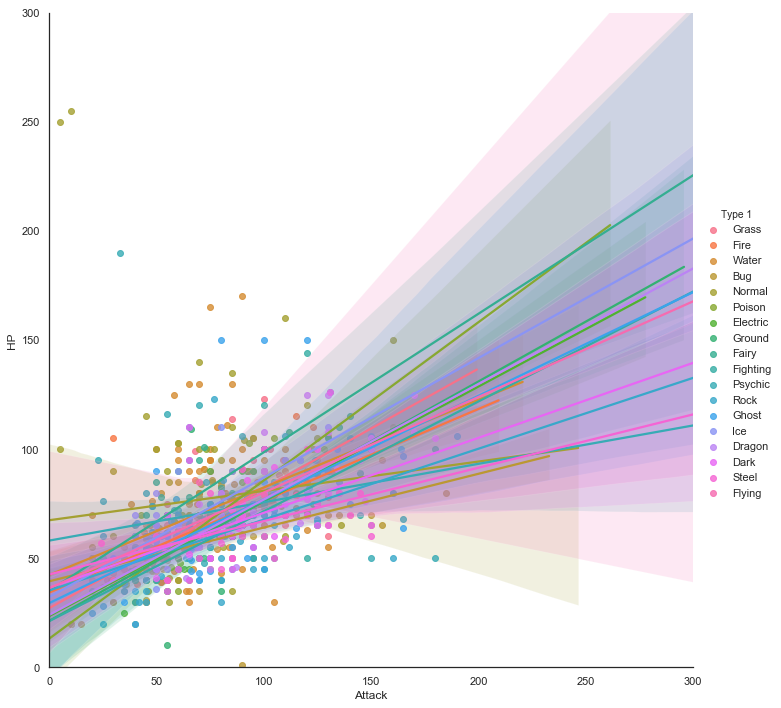

In [52]:
ex11=sns.lmplot(x="Attack",y="HP", hue="Type 1",data=df_2,height=10, aspect=1)
ex11.set(xlim=(0,300),ylim=(0, 300))

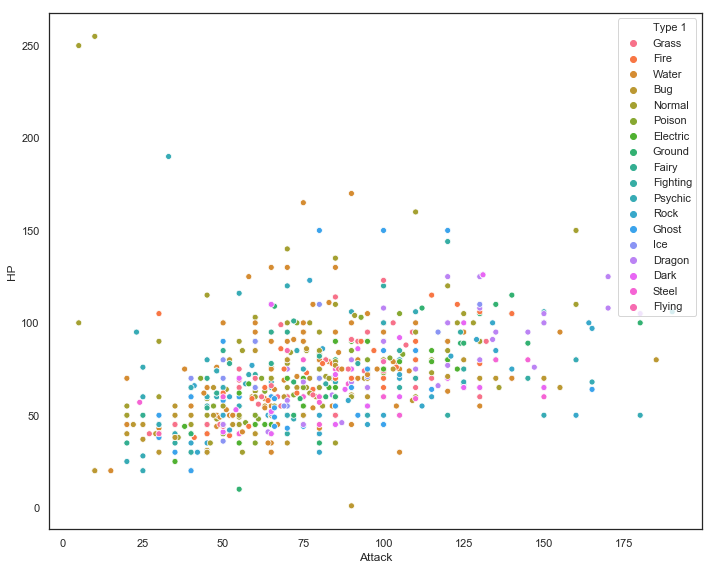

In [45]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax,x="Attack",y="HP", hue="Type 1",data=df_2)

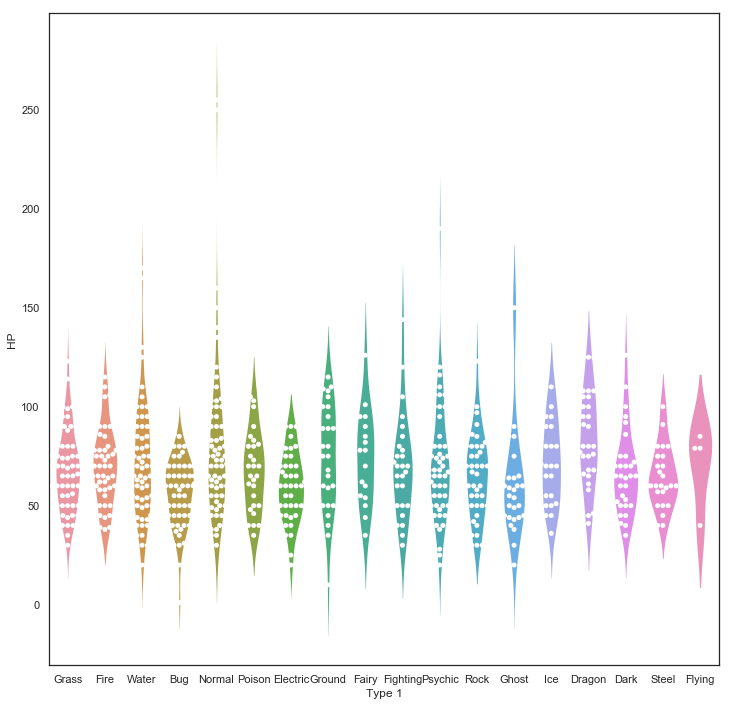

In [46]:
sns.set(rc={'figure.figsize':(12,12)}) # set plot size
sns.set_style("white") # set plot background
pokemon_fig = sns.violinplot(x="Type 1",y="HP",data=df_2,inner=None,linewidth=0)
pokemon_fig = sns.swarmplot(x="Type 1",y="HP",data=df_2,color="white",edgecolor="grey")

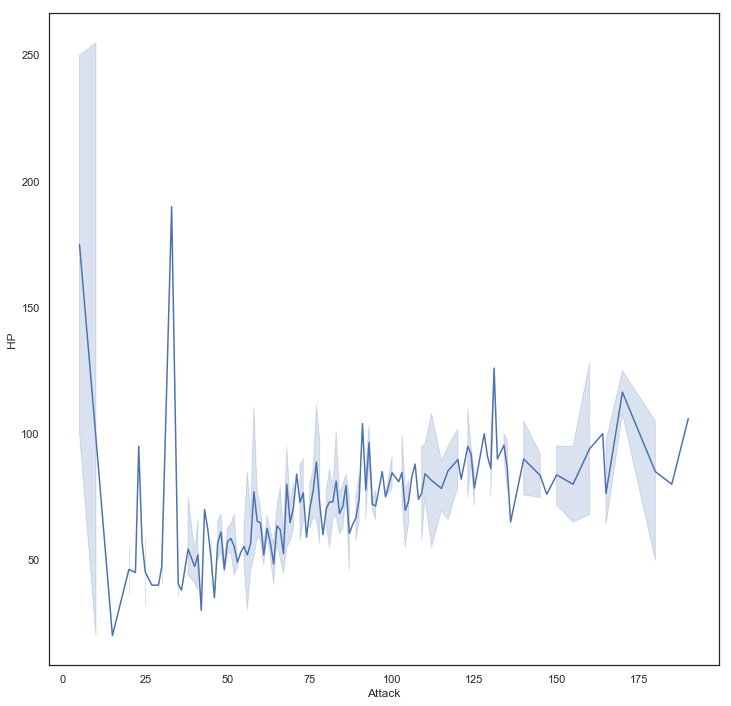

In [47]:
sns.lineplot(x="Attack",y="HP",data=df_2)

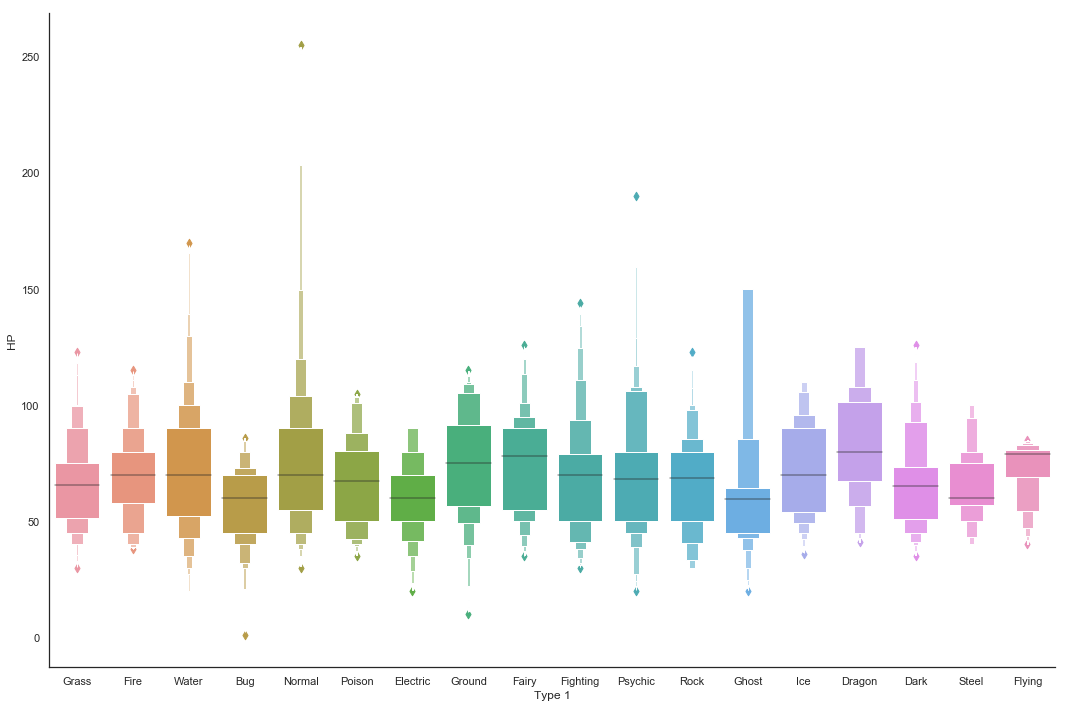

In [48]:
sns.set(rc={'figure.figsize':(12,12)}) # set plot size
sns.set_style('white') 
sns.catplot(x="Type 1",y="HP",data=df_2,kind='boxen',height=10, aspect=1.5)